<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Series-de-Fourier/blob/master/Intro_se%C3%B1ales_series_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Fourier Trigonométricas

In [ ]:
# Bibliotecas

import numpy as np
import matplotlib . pyplot as plt 

## Teorema de Fourier

Una función periódica de cuadrado integrable ($\int_{t_0}^\infty\,ds\,g^2(s)<\infty$) y período $T$ puede expresarse como una serie infinita de la forma
$$
g(t)=a_0+\sum_{p=1}^{\infty}\,a_n\,cos(n\,\omega_o\,t)+\sum_{p=1}^{\infty}\,b_n\,sen(p\,\omega_o\,t)\,,\quad{}con\,\,\,\omega_0=\frac{2\pi}{T}$$

* $a_0=\frac{1}{T}\int_0^T\,ds\,g(s)$

* $a_n=\frac{2}{T}\int_0^T\,ds\,g(s)\,cos(\omega_n\,s)$

* $b_n=\frac{2}{T}\int_0^T\,ds\,g(s)\,sen(\omega_n\,s)$

## Cometarios de interés

* La cantidad $f=\frac{1}{T}$ es denomina  frecuencia fundamental de $g$, cuando la variable $(t)$ es temporal y se mide en segundos, la frecuencia se mide en $Hz$. 
* La cantidad $\omega_0=2\pi\,f$ se conoce como *frecuncia angular fundamental*, mientras que las $n\,f$ y $\omega_n$ se denominan subarmóniocs.  
* Las funciones periódicas de cuadrado integrable constituyen un espacio vectorial ($\mathcal{L}^2$) de dimensión infinita
* $\mathcal{L}^2$ posee un producto vectorial y una norma dados por:
$$<f|g>\equiv{}\int_0^T\,ds\,f(t)g(t)\,,\qquad{}||f||\equiv{}<f|f>$$
* La serie de Fourier puede (y debe) pensarse como el  desarrollo del vector $f(t)$ en una base del espacio, en este caso, la base compuesta por el conjunto de vectores:
$$\mathcal{B}=\{\mathbf{u}_0,\mathbf{u}_1,\mathbf{e}_1,\mathbf{u}_2,\mathbf{e}_2...\}=\{1,cos(\omega_0\,t),sen(\omega_0\,t),cos(2\omega_0\,t),sen(2\omega_0\,t),....\}$$
* En el lenguaje ordinario de álgebra líneal, $\mathcal{B}$ es una base ortogonal y por lo tanto, los coeficientes del desarrollo de un vector en términos de los elementos de $\mathcal{B}$ son
$$a_n=\frac{<\mathbf{u}_n|f>}{||\mathbf{u}_n||}\,\,\qquad{}\,b_n\frac{<\mathbf{e}_n|f>}{||\mathbf{e}_n||}$$
* Otra forma de encontrar los coeficientes es pedir que el error cuadrático medio 
$$\varepsilon\equiv{}||f-\mathcal{S}_N||$$
entre $f$ y la suma parcial
$$S_N=a_0+\sum_{p=1}^{N}\,a_n\,cos(n\,\omega_o\,t)+\sum_{p=1}^{N}\,b_n\,sen(p\,\omega_o\,t)\,,$$
pensada como función de los coeficientes, alcance un mínimo

# Algunas series de Fourier 

# E 1: Onda Triangular

$$f(t)=\sum_{n=0}^\infty\,c_n\,cos(\omega_n\,t)$$

$$c_n=-\frac{4}{\pi}\,\frac{1}{(2n+1)^2}\,\quad{}\omega_n=(2n+1)\omega_0\,\quad{}\omega_0=2\pi\,.f$$

Donde $f$ es la frecuencia en $Hz$

In [ ]:
#=====================================
# Coeficientes de Fourier para la onda triangular
# Arfken, prob 14.3.4

def coeff_tri_a(N):
  a=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    k=2.*n+1
    a[n]=-4./(np.pi*k*k) 
  return a

#=====================================

# Señal triangular
# A esta función se pasan los siguientes parámetros: 
# x, la variable (función(x)). 
# f la frec. en Hz y 
# p el número de términos que sumaremos

def s_triang(x,f,p):
    c=coeff_tri_a(p)
#   val=np.pi/2
    val=0.
    omega_0=2.*np.pi*f
    for n in range(0,p):
       omega_n=(2.*n+1)*omega_0
       #
       val = val-c[n]*np.cos(omega_n*x)
    return val

#=====================================


# E 2: Onda Cuadrada

Para este ejemplo tomaremos ventaja del siguiente teorema: 

*Cuando las series de Fourier convergen uniformemente (ese es el caso de la onda triangular), se pueden derivar (e integrar) término a término*.

Si se piensa un poco, resulta evidente que la derivada de la onda triangular es una onda cuadrada cuyos valores representan la alternancia de las pendientes de la onda triangular.

$$\frac{df(t)}{dt}=-\sum_{n=0}^\infty\,\omega_n\,c_n\,sen(\omega_n\,t)=\sum_{n=0}^\infty\,\omega_n\,c_n\,cos(\omega_n\,t+\phi_n)$$

acá, los $c_n$ y $\omega_n$ son los de la onda triangular y las fases $\phi_n$ son idénticas con valor $-\pi/2$.  Es decir, la derivación implica multiplicar los coeficientes por las frecuencias que les corresponden y adelantar $cos(...)$ en $\pi/2$. 

**NOTA** En el contínuo (cuando hacemos transformada de Fourier) la derivación corresponde a la multiplicación por $-i\,\omega$, es decir:

$$\frac{d}{dt}\leftrightarrow{}-i\omega$$

Como último comentario, notemos como las discontinuidades de primer orden llevan a la aparición del _fenómeno de Hibbs_ (Hibbs overshoot).

In [ ]:
# El pase de parámetros es igual al de la onda triangular

def s_square(x,f,p):  
    c=coeff_tri_a(p) # Nótese la llamada a los coeficientes de la onda triangular

    val=0.
    omega_0=2.*np.pi*f
    for n in range(0,p):
       omega_n=(2.*n+1)*omega_0
       #
       val = val+omega_n*c[n]*np.cos(omega_n*x-np.pi/2.)
    return val

# E 3: Onda Diente de Sierra

$$f(t)=\frac{1}{2}+\sum_{n=1}^\infty\,c_n\,sen(\omega_n\,t)$$

$$c_n=-\frac{1}{n\pi}\,\quad{}\omega_n=n\omega_0\,\quad{}\omega_0=2\pi\,.f$$

Donde $f$ es la frecuencia en $Hz$

In [ ]:
#=====================================
# Coeficientes de Fourier para la onda diente de sierra
# https://mathworld.wolfram.com/FourierSeriesSawtoothWave.html

def coeff_sawtooth(N):
  A=np.zeros(N) #inicializacion
  # Calculo
  for n in range(1,N):
    A[n]=-1./(np.pi*n) 
  return A

#=====================================

# Señal diente de sierra
# A esta función se pasan los siguientes parámetros: 
# x, la variable (función(x)). 
# f la frec. en Hz y 
# p el número de términos que sumaremos

def s_sawtooth(x,f,p):
    c=coeff_sawtooth(p)
    val=1/2
    omega_0=2.*np.pi*f
    for n in range(0,p):
       omega_n=n*omega_0
       #
       val = val+c[n]*np.sin(omega_n*x)
    return val

#=====================================


# E 4: Integración de la Onda Triangular

$$g(t)=\sum_{n=0}^\infty\,\frac{1}{\omega_n}\,c_n\,sen(\omega_n\,t)$$

$$c_n=-\frac{4}{\pi}\,\frac{1}{(2n+1)^2}\,\quad{}\omega_n=(2n+1)\omega_0\,\quad{}\omega_0=2\pi\,.f$$


In [ ]:
# Integracion de la triangular

def I_triang(x,f,p): # Integración de la onda triangular
    c=coeff_tri_a(p) # Nótese la llamada a los coeficientes de la onda triangular

    val=0.
    omega_0=2.*np.pi*f
    for n in range(0,p):
       omega_n=(2.*n+1)*omega_0
       #Triangular Int
       val = val+(c[n]/omega_n)*np.cos(omega_n*x+np.pi/2.)
    return val

# E 5: Onda totalmente rectificada

In [ ]:
# Coeficientes de Fourier para la onda rectificada

def coeff_rectified_a(N):
  a=np.zeros(N) #inicializacion
  # Calculo
  for n in range(N):
    k=2*(n+1)
    a[n]=-4./(k**2-1) 
  return a

# Onda rectificada

def s_fullrectified(x,f,p):
    b=coeff_rectified_a(p)
    val=2./np.pi
    omega_0=2.*np.pi*f
    for n in range(p):
      omega_n=omega_0*n
      val = val+b[n]*np.cos(omega_n*x)/(np.pi)
    return val

## Uso de un diccionario para la escogencia de la serie que queremos estudiar

In [ ]:
Series={'1':s_triang,'2':s_square,'3':s_fullrectified,'4':s_sawtooth}

titulo={'1': 'triangular','2':'cuadrada','3':'Onda rectificada','4':'Diente de Sierra'}

print('Escoja su serie:','\n')
print('1 para onda triangular, 2 para onda cuadrada, 3 para onda rectificada, 4 para Diente de Sierra')

W_ave=input('Su escogencia? ')

Escoja su serie: 

1 para onda triangular, 2 para onda cuadrada, 3 para onda rectificada, 4 para Diente de Sierra
Su escogencia? 1


# Cálculo de los valores de la serie en el dominio de interés.

In [ ]:
frec=float(input('Introduzca la frecuencia en Hz '))

N_terms=int(input('cuantos terminos desea sumar? '))

t_max=2 # segundos

t = np.arange ( 0. , 2. , 0.01)

N_samples=int(t_max/0.01)


# Inicialización del vector (lista) de valores que se graficaran

y=np.zeros(N_samples)

# Evaluacion de la serie en el intervalo de interes

#y=s_triang(t,p) # aprovechando la evaluación "vectorial" de Oython. t es una lista
#y=s_square(t,frec,p)

y=Series[W_ave](t,frec,N_terms) #W_ave es el 'nombre' de la onda.

Introduzca la frecuencia en Hz 0.55
cuantos terminos desea sumar? 3


Por favor observe que los aspectos de ''larga duración'' de la función se relacionan directamente con los subarmónicos asociados a las bajas frecuencias, mientras que los aspectos de corta duración son descritos por los subarmóniocs de frecuencias altas.

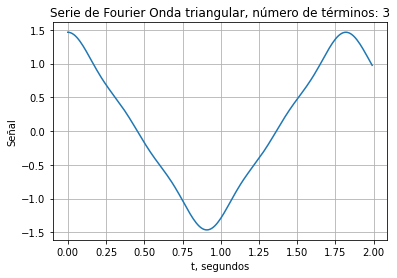

In [ ]:
# Graficación

#plt.legend(loc='best')
plt.title('Serie de Fourier Onda '+str(titulo[W_ave])+', número de términos: '+str(N_terms))
plt.ylabel('Señal')
plt.xlabel('t, segundos')
plt.grid()
plt.plot (t , y )
#plt.savefig ( "wtf.pdf" )
plt.show () 


# Filtros de Frecuencia

## Filtros pasa bajo

In [ ]:
def low_pass_10(N):
  filt=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    filt[n]=1.-n/N 
  return filt

def low_pass_20(N):
  filt=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    k=.05*n+1
    filt[n]=1./k 
  return filt


def low_pass_30(N):
  filt=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    k=.05*n+1
    filt[n]=1./k**1.5 
  return filt

def low_pass_40(N):
  filt=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    k=.5*n+1
    filt[n]=1./k 
  return filt


## Graficación de los filtros.

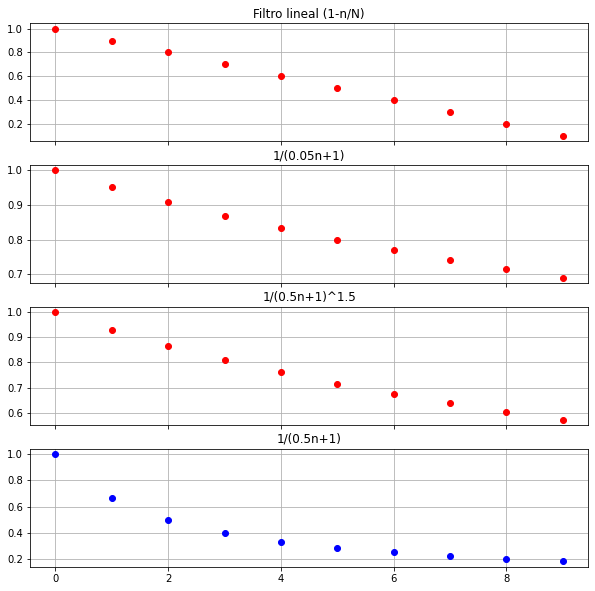

In [ ]:
# Graficación

fig, (ax_Low_Pass_10,ax_Low_Pass_20,ax_Low_Pass_30,ax_Low_Pass_40) = plt.subplots(4,1,sharex=True,figsize=(10,10))
#
# FILTRO 10
ax_Low_Pass_10.plot(low_pass_10(N_terms),'ro')
ax_Low_Pass_10.set_title('Filtro lineal (1-n/N)')
ax_Low_Pass_10.grid()


# FILTRO 20
ax_Low_Pass_20.plot(low_pass_20(N_terms),'ro')
ax_Low_Pass_20.set_title('1/(0.05n+1)')
ax_Low_Pass_20.grid()
#fig.tight_layout()

# FILTRO 30
ax_Low_Pass_30.plot(low_pass_30(N_terms),'ro')
ax_Low_Pass_30.set_title('1/(0.5n+1)^1.5')
ax_Low_Pass_30.grid()
#fig.tight_layout()

#
# FILTRO 40
ax_Low_Pass_40.plot(low_pass_40(N_terms),'ro',color='blue')
ax_Low_Pass_40.set_title('1/(0.5n+1)')
ax_Low_Pass_40.grid()
#fig.tight_layout()


fig.show()

In [ ]:
print(low_pass_10(N_terms))

[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]


## Efecto de los filtros

In [ ]:
Filtros={'1':low_pass_10,'2':low_pass_20,'3':low_pass_30,'4':low_pass_40}

titulo={'1': '1111','2':'2222','3':'333','3':'444'}

print('Escoja su serie:','\n')
print('1 para onda triangular, 2 para onda cuadrada, 3 para onda rectificada')

W_ave=input('Su escogencia? ')

Escoja su serie: 

1 para onda triangular, 2 para onda cuadrada, 3 para onda rectificada
Su escogencia? 2


Introduzca la frecuencia en Hz 0.5
cuantos terminos desea sumar? 10


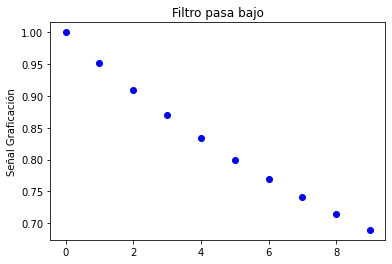

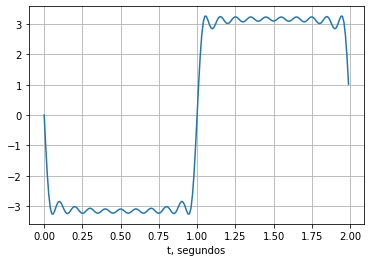

In [ ]:
def filtered_square(x,f,p):  
    c=coeff_tri_a(p) # Nótese la llamada a los coeficientes de la onda triangular
    filtro=low_pass_20(p)
    c=c*filtro
    val=0.
    omega_0=2.*np.pi*f
    for n in range(0,p):
       omega_n=(2.*n+1)*omega_0
       #
       val = val+omega_n*c[n]*np.cos(omega_n*x-np.pi/2.)
    return valdef filtered_square(x,f,p):  
    c=coeff_tri_a(p) # Nótese la llamada a los coeficientes de la onda triangular
    filtro=low_pass_20(p)
    c=c*filtro
    val=0.
    omega_0=2.*np.pi*f
    for n in range(0,p):
       omega_n=(2.*n+1)*omega_0
       #
       val = val+omega_n*c[n]*np.cos(omega_n*x-np.pi/2.)
…plt.plot (t , z )
#plt.savefig ( "wtf.pdf" )
plt.show () 


frec=float(input('Introduzca la frecuencia en Hz '))

N_terms=int(input('cuantos terminos desea sumar? '))

t_max=2 # segundos

t = np.arange ( 0. , 2. , 0.01)

N_samples=int(t_max/0.01)


# Inicialización del vector (lista) de valores que se graficaran

z=np.zeros(N_samples)

# Evaluacion de la serie en el intervalo de interes

#y=s_triang(t,p) # aprovechando la evaluación "vectorial" de Oython. t es una lista
#y=s_square(t,frec,p)

z=filtered_square(t,frec,N_terms) #W_ave es el 'nombre' de la onda.


#plt.legend(loc='best')
plt.title('Serie de Fourier Onda '+str(titulo[W_ave])+', número de términos: '+str(N_terms))
plt.ylabel('Señal Graficación')
plt.title('Filtro pasa bajo')
plt.plot(low_pass_20(N_terms),'ro',color='blue')
#plt.title('Serie de Fourier Onda '+str(titulo[W_ave])+', número de términos: '+str(N_terms))
#plt.ylabel('Señal')
#plt.xlabel('t, segundos')
#plt.grid()
#plt.plot (t , z )
#plt.savefig ( "wtf.pdf" )
plt.show ()
plt.xlabel('t, segundos')
plt.grid()
plt.plot (t , z )
#plt.savefig ( "wtf.pdf" )
plt.show () 

## Filtros pasa altas

In [ ]:
# High pass 1



def high_pass_10(N):
  filt_1=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    filt_1[n]=0.1*n/N 
  return filt_1

def high_pass_20(N):
  filt_2=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    filt_2[n]=np.tanh(2.5*n/(N)) 
  return filt_2

def high_pass_30(N):
  filt_3=np.zeros(N) #inicializacion
  # Calculo
  for n in range(0,N):
    k=n
    filt_3[n]=k/np.sqrt(1+(k/25.)**2)
  return filt_3





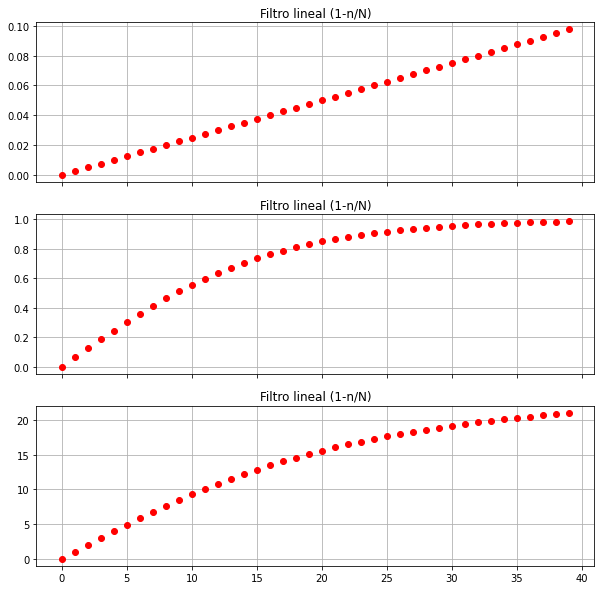

In [ ]:
# Graficación

N_terms=40

fig, (ax_high_pass_10,ax_high_pass_20,ax_high_pass_30) = plt.subplots(3,1,sharex=True,figsize=(10,10))
#
# FILTRO 10
ax_high_pass_10.plot(high_pass_10(N_terms),'ro')
ax_high_pass_10.set_title('Filtro lineal (1-n/N)')
ax_high_pass_10.grid()

# FILTRO 10
ax_high_pass_20.plot(high_pass_20(N_terms),'ro')
ax_high_pass_20.set_title('Filtro lineal (1-n/N)')
ax_high_pass_20.grid()

# FILTRO 10
ax_high_pass_30.plot(high_pass_30(N_terms),'ro')
ax_high_pass_30.set_title('Filtro lineal (1-n/N)')
ax_high_pass_30.grid()

## Efectos del filtrado

Introduzca la frecuencia en Hz 0.5
cuantos terminos desea sumar? 15


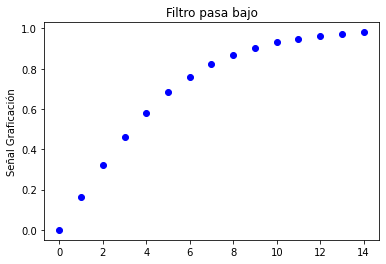

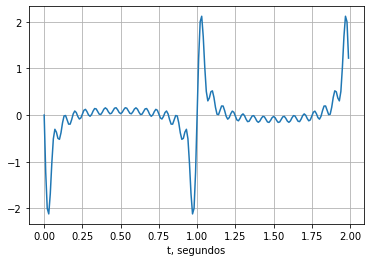

In [ ]:
def hp_filtered_square(x,f,p):  
    c=coeff_tri_a(p) # Nótese la llamada a los coeficientes de la onda triangular
    filtro=high_pass_20(p)
    c=c*filtro
    val=0.
    omega_0=2.*np.pi*f
    for n in range(0,p):
       omega_n=(2.*n+1)*omega_0
       #
       val = val+omega_n*c[n]*np.cos(omega_n*x-np.pi/2.)
    return val


frec=float(input('Introduzca la frecuencia en Hz '))

N_terms=int(input('cuantos terminos desea sumar? '))

t_max=2 # segundos

t = np.arange ( 0. , 2. , 0.01)

N_samples=int(t_max/0.01)


# Inicialización del vector (lista) de valores que se graficaran

z=np.zeros(N_samples)

# Evaluacion de la serie en el intervalo de interes

#y=s_triang(t,p) # aprovechando la evaluación "vectorial" de Oython. t es una lista
#y=s_square(t,frec,p)

z=hp_filtered_square(t,frec,N_terms) #W_ave es el 'nombre' de la onda.


#plt.legend(loc='best')
plt.title('Serie de Fourier Onda '+str(titulo[W_ave])+', número de términos: '+str(N_terms))
plt.ylabel('Señal Graficación')
plt.title('Filtro pasa bajo')
plt.plot(high_pass_20(N_terms),'ro',color='blue')
#plt.title('Serie de Fourier Onda '+str(titulo[W_ave])+', número de términos: '+str(N_terms))
#plt.ylabel('Señal')
#plt.xlabel('t, segundos')
#plt.grid()
#plt.plot (t , z )
#plt.savefig ( "wtf.pdf" )
plt.show ()
plt.xlabel('t, segundos')
plt.grid()
plt.plot (t , z )
#plt.savefig ( "wtf.pdf" )
plt.show () 